In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_table('C:/Users/kosuke/signate/wine/test.tsv')
train = pd.read_table('C:/Users/kosuke/signate/wine/train.tsv',index_col=0)
test_i = test.set_index('id')

C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [3]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [4]:
X = pd.DataFrame()
X = train.drop(['Y'], 1)
y = train['Y']

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, 
                                                    shuffle=True, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

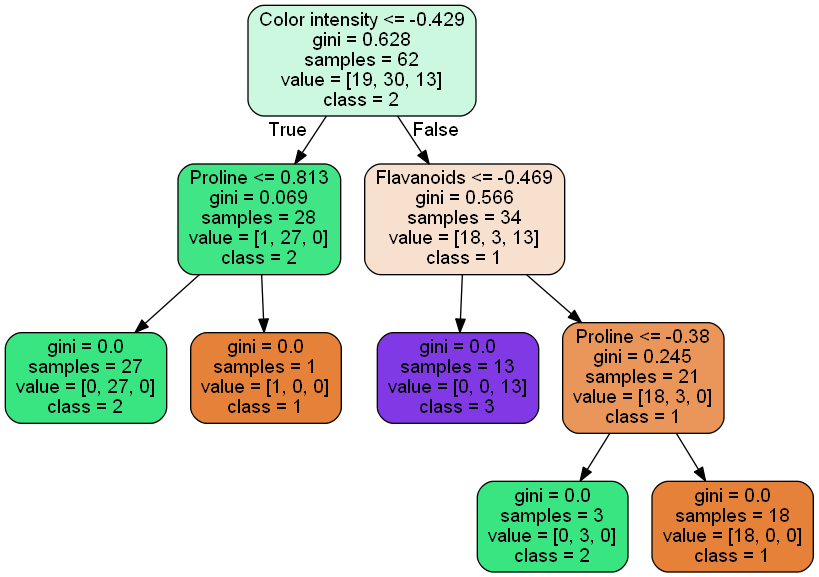

In [17]:
export_graphviz(clf, out_file="tree.dot", feature_names=X.columns, class_names=["1","2","3"], filled=True, rounded=True)
g = pydotplus.graph_from_dot_file(path="tree.dot")
g.write_png('figure-decisionTree.png')
Image(g.create_png())

In [20]:
df = pd.DataFrame(clf.predict_proba(X_val))
df = df.rename(columns={0: 'class_1',1: 'class_2',2: 'class_3'})
df.head()

,class_1,class_2,class_3
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [21]:
df = pd.DataFrame(clf.predict(X_val))
df = df.rename(columns={0: '判定'})
df.head()

,判定
0,2
1,1
2,2
3,3
4,1


In [22]:
clf.score(X_val,y_val)

0.9259259259259259

In [23]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
test['Y'] = clf.predict(test_i)

In [25]:
test['Y']

0     1
1     3
2     2
3     2
4     1
5     1
6     2
7     2
8     1
9     2
10    1
11    3
12    1
13    2
14    3
15    1
16    3
17    1
18    2
19    2
20    3
21    2
22    2
23    2
24    2
25    2
26    3
27    3
28    2
29    3
     ..
59    2
60    1
61    1
62    1
63    2
64    1
65    1
66    1
67    1
68    3
69    2
70    2
71    2
72    1
73    2
74    3
75    1
76    1
77    2
78    2
79    3
80    2
81    1
82    1
83    2
84    1
85    3
86    3
87    2
88    2
Name: Y, Length: 89, dtype: int64

In [26]:
test[['id', 'Y']].to_csv('./DecisionTree.csv', header=False, index=False)